# COGS 108 - Final Project 

# Overview

In the project, I would like to find out whether the size of parks in San Diego and yelp reviews counts of parks have correlation with the overall ratings on rating platforms - yelp. I mainly used dataset of "Park Locations Data" and "San Diego Parks Yelp Data" for parks that are located in San Diego. Based on the analysis, I found out that there is a slight positive linear relationship between the size and yelp ratings of parks. Also, there is a obvious positive linear correlation between the yelp review counts of parks and the ratings of parks.

# Name & GitHub ID

- Name: QIAOCHEN SUN
- GitHub Username: sunqiaochen

# Research Question

Do the size and yelp review numbers of parks in San Diego correlate with the park rating on rating platforms -- yelp? All parks of this analysis are located in San Diego.

## Background and Prior Work

As one of the most famous tourism cities in the United States, there are plenty of parks in San Diego. The parks have different types in San Diego. Regional Parks, Shoreline Parks, and Skate Parks are three main types of parks in San Diego. For example, one very reputated park called Balboa Park is one of regional parks in San Diego. Also, we could know that there are 42,263 acres of developed and undeveloped park land, joint use and open space [1]. From the documentation, we could know that the unit of parks area is acres, which are known in our "Park Locations Data".

Yelp is a popular site, where users are able to rate parks and write reviews in the comment section. After having fun in the park, people could give their own opinions and ratings on yelp websites. In this way, yelp website has gradually became a site that people will check before choosing parks.In my project, I try to find out that do the size and number of yelp reviews of parks in San Diego have correlation with the overall ratings on yelp. However, sometimes yelp ratings will be affected by other things that are unpredictable. For example, some people tend to give lower rating if they met some bad luck things in the parks, but bad luck has no relationship with the quality of parks. Therefore, the ratings might not be 100% accuracy even though the ratings could reflect the quality of parks in most of situations[2].

In my research, I found one paper that study the relationship between yelp review numbers and yelp ratings. The result shows that the impact of consumer reviews on the restaurant industry: (1) 5-7 percent increase in review counts leads to a one-star increase rating in Yelp (2) this effect is driven by independent restaurants; ratings do not affect restaurants with chain affiliation, and (3) chain restaurants have declined in market share as Yelp penetration has increased. From the results, we could find out that review counts do affect the ratings on yelp website, which provide reference for my project [3].




References (include links):
- 1) https://www.sandiego.gov/sites/default/files/fastfacts.pdf
- 2) https://hbswk.hbs.edu/item/the-yelp-factor-are-consumer-reviews-good-for-business
- 3) https://www.hbs.edu/faculty/Publication%20Files/12-016_a7e4a5a2-03f9-490d-b093-8f951238dba2.pdf

# Hypothesis


Based on the parks in my own city, with higher ratings on the website, the parks seem to be larger than other smaller parks, because if one park is very large, it means that there are more places to take a walk, do sports. Therefore, there is a positive relationship between the size of parks and the ratings of parks on yelp. Therefore, one of my hypothsis is that if the park rating on yelp is higher, the park will have more area and space. What's more, there is also a positive relationship between the yelp review counts of parks in San Diego and the ratings of parks on yelp, which means if one park have higher ratings on yelp, this park will have more yelp review numbers.

# Dataset(s)

- Dataset Name: ***Park Locations Data***(1), ***San Diego Parks Yelp Data***(2)
- Link to the dataset:(1):https://data.sandiego.gov/datasets/park-locations/ (2):https://www.yelp.com/developers/documentation/v3/business_search 

I will use two datasets that are provided by professor in my analysis. For Park Location Data, the form is geojson file that contains 8 features. The 8 features are ***the id of the park***, ***the park name***, ***the park alias***, ***gis_acres*** (the area of each park), ***park_type***, ***location***, ***owner***, ***geometry*** (coordinate of parks). This dataset has 2769 rows x 8 columns and I mainly use three features in the dataset -- ***park name***, ***alias***(another name of parks) and ***gis_acres*** (the area of the each park). For San Diego Parks Yelp Data, I use "yelp_SD_parks.csv" data which is in csv file. For "yelp_SD_parks.csv", I mainly utilize three features -- ***name*** (park name), ***rating***, ***review count***. The size of this dataset is 833 rows × 3 columns.

Since I want to find out the relationship between the size of parks and the ratings of parks, I need to combine these two features together. I will utilize merge to combine ***Park Location Data*** and ***yelp_SD_parks.csv data*** by the name of the parks. There might be some inconsistants between these two dataset, but I will choose the parks in both of the data to do analysis.

# Setup

In [1]:
import pandas as pd
import json
import geopandas as gpd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shapely.geometry as shp
import sklearn.neighbors as skn
import sklearn.metrics as skm
from mpl_toolkits.axes_grid1 import make_axes_locatable

import warnings
import descartes
import seaborn as sns

In [2]:
# read data
df_park = gpd.read_file("parks_datasd.geojson")
df_yelp_park = pd.read_csv("yelp_SD_parks.csv")

# Data Cleaning

***Remove columns that I do not need in three datasets***

In [4]:
# df_park data set
df_park = pd.DataFrame(df_park[['name','alias','gis_acres']])
df_park

,name,alias,gis_acres
0,South Carlsbad SB,South Carlsbad State Beach,115.895878
1,Torrey Pines SB,Torrey Pines State Beach,67.294309
2,Ruocco Park,Ruocco Park,3.312526
3,Tuna Harbor Park,Tuna Harbor Park,0.639035
4,San Diego Bayfront Park,San Diego Bayfront Park,3.669272
...,...,...,...
2764,San Luis Rey River Park,San Luis Rey River Park,712.262117
2765,Horse Creek Ridge Sports Park,Horse Creek Ridge Sports Park,8.398529
2766,,Harmony Grove Village 4th of July Park,2.510408
2767,Harmony Grove Community Park,Harmony Grove Village Community Park,3.575260


In [5]:
# df_yelp_park data
df_yelp_park = pd.DataFrame(df_yelp_park[['name','rating','review_count','is_closed']])
df_yelp_park

,name,rating,review_count,is_closed
0,Balboa Park,5.0,2105,False
1,Civita Park,4.5,46,False
2,Waterfront Park,4.5,242,False
3,Trolley Barn Park,4.5,102,False
4,Bay View Park,5.0,42,False
...,...,...,...,...
828,Del Cerro - San Diego,4.5,12,False
829,San Diego Metropolitan Transit System,2.5,268,False
830,Petco Park,4.0,1667,False
831,Ann D. L'Heureux Memorial Dog Park,3.0,50,False


***In this part, I need to do something that make name of parks consistent. I plan to make all names in lowercase so that it is easy to merge different dataset. I also need to rename some columns to perform better data analysis***

df_park

In [8]:
# function to lower the name
def lower(s):
    return s.lower()

# df_park
# lower all the name and sort them
df_park['name'] = df_park['name'].apply(lower)
df_park = df_park.sort_values(by='name')

In [9]:
# drop the rows that miss at least one data

In [10]:
df_park.index = range(0,2769)
df_park = df_park.drop(list(range(0,14)))
df_park.index = range(0,2755)
df_park

,name,alias,gis_acres
0,30th st mp,30th St Park,0.228497
1,32nd st canyon os,32nd St Canyon Open Space,0.195944
2,32nd st canyon os,32nd St Canyon Open Space,0.407552
3,32nd st canyon os,32nd St Canyon Open Space,0.063489
4,32nd st canyon os,32nd St Canyon Open Space,0.255463
...,...,...,...
2750,woodland park,Woodland Park,14.672094
2751,yacht club promenade pocket park,Yacht Club Promenade Pocket Park,0.498868
2752,z st mp,Z St Park,0.365955
2753,zena mp,Zena Park,0.063096


df_yelp_park

In [11]:
df_yelp_park['name'] = df_yelp_park['name'].apply(lower)
df_yelp_park = df_yelp_park.sort_values(by='name')
df_yelp_park.index = range(0,833)
df_yelp_park

,name,rating,review_count,is_closed
0,13th & market,3.5,85,False
1,1935 cactus garden,5.0,1,False
2,4s patriot park,4.5,16,False
3,4s ranch community park,5.0,17,False
4,5 star dealer school,5.0,1,False
...,...,...,...,...
828,working class,4.5,498,False
829,you & yours distilling co,5.0,185,False
830,zeglio custom clothiers,5.0,51,False
831,zeglio custom clothiers,5.0,25,False


***Merge datasets*** :At here I only merge two dataset(df_yelp_parks and df_parks), because the name in group_yelp_review dataframe is very wired and do not have common parks name with these two dataset, so I choose to not merge group_yelp_review.
Due to many reasons, even though there are 833 datasets in ***df_yelp_park***, and there are 2755 datasets in ***df_park**, there are plenty of spaces like school, and garden which cannot count as park and the name of one park will be different based on two datasets. Therefore, there are only 67 overlapped park name, which is enough for our analysis.


In [13]:
#at here we only merge two dataset(df_yelp_parks and df_parks), because the name in group_yelp_review dataframe is very wired
#and do not have common parks name with these two dataset, so we choose to not merge group_yelp_review.
combined = pd.merge(df_yelp_park, df_park, on='name')
combined

,name,rating,review_count,is_closed,alias,gis_acres
0,4s ranch community park,5.0,17,False,4S Ranch Community Park,3.241830
1,balboa park,5.0,2105,False,Balboa Park,1089.476460
2,big rock park,4.5,31,False,Big Rock Park,5.674329
3,blue sky ecological reserve,4.5,55,False,Blue Sky Ecological Reserve,12.452234
4,blue sky ecological reserve,4.5,55,False,Blue Sky Ranch Ecological Reserve,83.767053
...,...,...,...,...,...,...
62,sunset park,3.5,2,False,Sunset Park,6.769626
63,sunset park,3.5,2,False,Sunset Park,17.630280
64,sunset view park,4.5,5,False,Sunset View Park,11.768480
65,torrey pines state reserve,4.5,1319,False,Torrey Pines State Reserve,198.780945


# Data Analysis & Results

### Data visualization

First, I need to check the distributions of **rating**, **gis_acres**, and **review_count**

Text(0, 0.5, 'frequency')

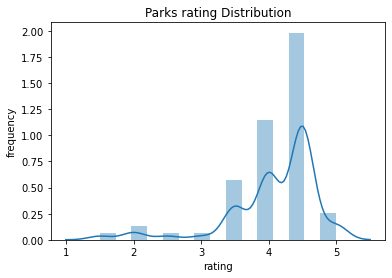

In [14]:
ax = sns.distplot(combined['rating'])
ax.set_title('Parks rating Distribution')
ax.set_ylabel('frequency')

Figure 1: This figure illustrate the overall distribution of ratings of differet parks in San Diego. We could see that almost half of parks in combined dataset have 4.5 ratings and these are small number of parks have ratings that under 3.5 ratings.

Text(0, 0.5, 'frequency')

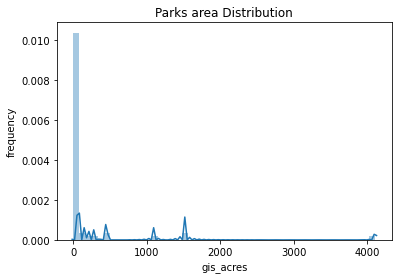

In [15]:
ax = sns.distplot(combined['gis_acres'])
ax.set_title('Parks area Distribution')
ax.set_ylabel('frequency')

Figure 2: This figure illustrate the overall distribution of area of differet parks in San Diego. We could see that most of parks in combined dataset have less than 100 acres area, but there are some exceptions that affect the overall distributions. Therefore, I decide to limit the area number under 100 acres to make another distributions.

In [16]:
# get the dataset that gis_acres < 100 acres
combine = combined[combined['gis_acres'] <= 100]
combine[:10]

,name,rating,review_count,is_closed,alias,gis_acres
0,4s ranch community park,5.0,17,False,4S Ranch Community Park,3.241830
2,big rock park,4.5,31,False,Big Rock Park,5.674329
3,blue sky ecological reserve,4.5,55,False,Blue Sky Ecological Reserve,12.452234
4,blue sky ecological reserve,4.5,55,False,Blue Sky Ranch Ecological Reserve,83.767053
5,borrego springs park,5.0,3,False,Borrego Springs County Park,15.979215
6,briercrest park,4.0,20,False,Briercrest Park,3.473216
8,centennial park,4.5,37,False,Centennial Park,1.778897
9,centennial park,4.5,37,False,Centennial Park,1.656224
10,chicano park,4.5,86,False,Chicano Park,0.514463
11,collier park,3.5,2,False,Collier County Park,8.149171


Text(0, 0.5, 'frequency')

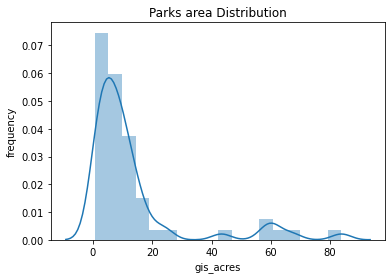

In [17]:
ax = sns.distplot(combine['gis_acres'])
ax.set_title('Parks area Distribution')
ax.set_ylabel('frequency')

Figure 3: After cutting the dataset, we could find out that most of parks only have about 10 acres, which is not very large. Only few parks that have area larger than 100 acres.

Text(0, 0.5, 'frequency')

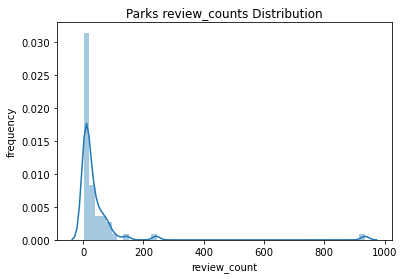

In [18]:
ax = sns.distplot(combine['review_count'])
ax.set_title('Parks review_counts Distribution')
ax.set_ylabel('frequency')

Figure 4: We have same situation like area data above. Most of number of reviews are under about 120 times. Therefore, we need to make another plot.

In [19]:
combine = combined[combined['review_count'] <= 120]
combine[:10]

,name,rating,review_count,is_closed,alias,gis_acres
0,4s ranch community park,5.0,17,False,4S Ranch Community Park,3.241830
2,big rock park,4.5,31,False,Big Rock Park,5.674329
3,blue sky ecological reserve,4.5,55,False,Blue Sky Ecological Reserve,12.452234
4,blue sky ecological reserve,4.5,55,False,Blue Sky Ranch Ecological Reserve,83.767053
5,borrego springs park,5.0,3,False,Borrego Springs County Park,15.979215
6,briercrest park,4.0,20,False,Briercrest Park,3.473216
8,centennial park,4.5,37,False,Centennial Park,1.778897
9,centennial park,4.5,37,False,Centennial Park,1.656224
10,chicano park,4.5,86,False,Chicano Park,0.514463
11,collier park,3.5,2,False,Collier County Park,8.149171


Text(0, 0.5, 'frequency')

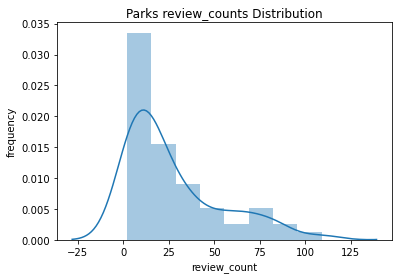

In [20]:
ax = sns.distplot(combine['review_count'])
ax.set_title('Parks review_counts Distribution')
ax.set_ylabel('frequency')

Figure 5: Seems like we have a right skewed distribution here. Most of number of reviews are less than 100 times and right skewed.

In [21]:
#transform to be able to see the absolute change instead of the relative change because there are some outliers in the data
combined['rating'] = np.log10(combined['rating'])
combined['gis_acres'] = np.log10(combined['gis_acres'])

Text(0.5, 1.0, 'Relationship between yelp rating and area of parks')

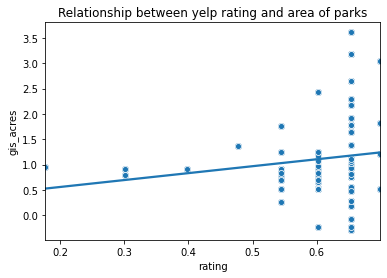

In [27]:
sns.regplot(x="rating",
            y="gis_acres", 
            ci=None,
            data=combined)
ax = sns.scatterplot(x='rating', y='gis_acres', data=combined)
ax.set_title('Relationship between yelp rating and area of parks')

Figure 6: Based on this scatterplot it seems like there is a little positive correlation between yelp rating and area of parks.

In [478]:
combined['review_count'] = np.log10(combined['review_count'])

Text(0.5, 1.0, 'Relationship between yelp rating and review counts')

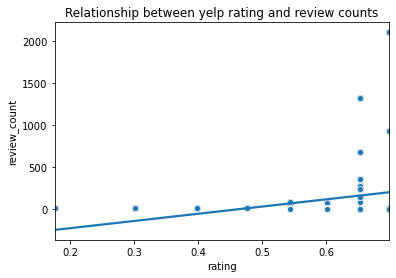

In [28]:
sns.regplot(x="rating",
            y="review_count", 
            ci=None,
            data=combined)
ax = sns.scatterplot(x='rating', y='review_count', data=combined)
ax.set_title('Relationship between yelp rating and review counts')

figure 7: Based on this scatterplot it seems like with higher ratings of parks on yelp, yelp review counts of parks will be larger

# Ethics & Privacy

I am doing individual project of COGS 108, which means all my datasets were given by my professor, so I do have permission to use these datasets. My professor provided all links to given datasets, so I think the sources of datasets are very ethical and secure.

I do not think there are some privacy problems in my project. First, all my datasets are accessible to the public, which means we could all parse the data from governmnet websites. Second, the datasets are all about public parks, so I do not think there will be some personal privacy problems of public parks. Third, I used yelp data in my analysis and all yelp data are shown on yelp website, which means every one could access the data.

There is potential bias in my data. For yelp dataset that I used, many people do not have yelp accounts, so even though they have some thoughts about the parks, they will not have any comments on the yelp website. I found out most of yelp users are under 40 years old, which means I cannot collect opinions of elder people.

One of possible consequences considering equitable impact of my analysis could be that my results might influence the way people choose parks. If people read my research and are influenced by my research, they might choose parks that have more yelp reviews or choose the larger parks to have fun instead of choosing random parks, which are unfair for smaller parks or parks with less yelp reviews or even those parks are not on yelp website. However, I believe this research is only for Cogs108 class, so if we do not put this research online, there will not be any problems.

# Conclusion & Discussion

In this project, I try to find out the question that do the size and number of yelp reviews of parks in San Diego have correlation with the overall ratings on yelp. I utilized two datasets in my project. First one is ***Park Locations Data***, and the second one is ***San Diego Parks Yelp Data***. After performing data cleaning, data analysis, I concluded that there is a slight positive linear relationship between the size and yelp ratings of parks. The higher ratings on yelp, the larger the park is in San Diego. Also, there is a positive linear correlation between the yelp review counts of parks and the ratings of parks. In the analysis, I first utilized data cleaning to clean two datasets and used "merge" to combine them together. In the combined dataframe, I have park name, yelp rating, review number, and gis-acres(area of parks). After performing data cleaning, I started to do data analysis and data visualization to show the relationships. I utilized seaborn package to plot displot and scatter plot to find the positive linear relationship between park area and parks yelp rating. And the linear relationship between parks yelp review counts and parks yelp rating. It seems like my hypothesis is correct based on my analysis and conclusions.

One limitation is that the data I used could be bias, because most of yelp users are young people. Therefore, it is very hard to collect the opinions of older people. Another limitation is that the way I combined these two datasets are merging by the name of park name. However, the naming method might be different between these two datasets, so I only found 65 overlapped park names.